# Postdam PM2.5 Deep Learning Forecasting 

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
#pip install tensorflow==2.15.0

In [2]:
#pip install keras-tuner==1.4.6 

In [3]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [4]:
import model_base as mb
import deep_learning as dl


# %env TF_ENABLE_ONEDNN_OPTS=0
# print(os.environ["TF_ENABLE_ONEDNN_OPTS"])
# oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable

## Data Exploration

* Load Data


In [5]:
df_hourly, df_daily, df_weekly, df_monthly = mb.read_date_freq()

# Artificial Neural Network (ANN)

An Artificial Neural Network (ANN) is a computational model based on the structure and functions of biological neural networks. Information flows through networks of interconnected nodes, or neurons, each processing input and passing their output to the next layer. These networks are capable of learning complex patterns using algorithms that adjust connections between neurons based on the input data.

ANNs consist of input, hidden, and output layers. The hidden layers can perform nonlinear transformations on the inputs, allowing ANNs to model complex relationships. They're applied in various fields like image and speech recognition, natural language processing, and predictive analytics.

Comparatively, a Recurrent Neural Network (RNN) is specialized for processing sequences, capturing temporal dependencies by using loops within the network. However, standard RNNs struggle with long-term dependencies due to issues like vanishing gradients.

Long Short-Term Memory (LSTM) networks are a type of RNN designed to overcome this limitation. They include mechanisms called gates that regulate the flow of information and allow the network to retain or discard data over long sequences, making them more effective for tasks like time series analysis and language modeling.

Convolutional Neural Networks (CNNs) are another specialized kind of ANN designed for grid-like data, such as images. CNNs employ filters to perform convolution operations that capture spatial hierarchies and features, making them powerful for image and video recognition tasks.

Each type of network—ANN, RNN, LSTM, and CNN—serves different purposes and excels in different applications, from the general pattern recognition of ANNs to the nuanced temporal or spatial data handling in RNNs, LSTMs, and CNNs, respectively.


* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.00014014488528467923, 'num_layers': 3, 'units': [448, 256, 160], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10


2024-02-13 18:10:52.372669: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-13 18:10:52.372691: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-13 18:10:52.372694: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-13 18:10:52.372917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-13 18:10:52.373162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


   1/1643 [..............................] - ETA: 13:06 - loss: 0.2809 - mean_absolute_error: 0.4209

2024-02-13 18:10:52.870575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1643/1643 [==============================] - ETA: 0s - loss: 0.0076 - mean_absolute_error: 0.0588INFO:tensorflow:Assets written to: dnn_model_H/assets


INFO:tensorflow:Assets written to: dnn_model_H/assets


1643/1643 [==============================] - 11s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0588 - val_loss: 0.0018 - val_mean_absolute_error: 0.0296
Epoch 2/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0344 - val_loss: 0.0020 - val_mean_absolute_error: 0.0326
Epoch 3/10
1636/1643 [============================>.] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0277INFO:tensorflow:Assets written to: dnn_model_H/assets


INFO:tensorflow:Assets written to: dnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0277 - val_loss: 0.0013 - val_mean_absolute_error: 0.0224
Epoch 4/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0239 - val_loss: 0.0015 - val_mean_absolute_error: 0.0244
Epoch 5/10
1642/1643 [============================>.] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0216INFO:tensorflow:Assets written to: dnn_model_H/assets


INFO:tensorflow:Assets written to: dnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0216 - val_loss: 0.0011 - val_mean_absolute_error: 0.0202
Epoch 6/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0195 - val_loss: 0.0013 - val_mean_absolute_error: 0.0215
Epoch 7/10
1643/1643 [==============================] - 9s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0183 - val_loss: 0.0012 - val_mean_absolute_error: 0.0209
Epoch 8/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0175 - val_loss: 0.0012 - val_mean_absolute_error: 0.0214
Epoch 9/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0166 - val_loss: 0.0012 - val_mean_absolute_error: 0.0206
Epoch 10/10
1643/1643 [==============================] - 10s 6ms/step - loss: 9.9484e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0012 - val_mean_absolute_error: 0.0201
Model

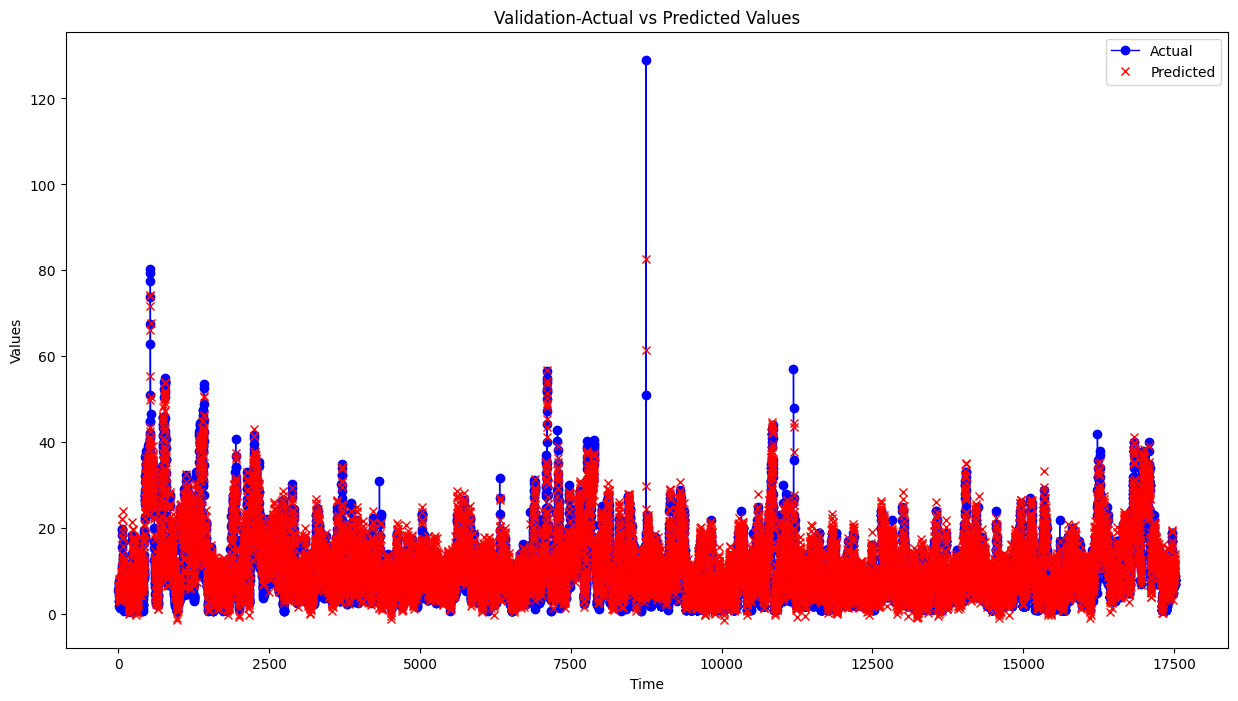

MAE: 2.5251
MSE: 11.1832
RMSE: 3.3441
MAPE: 0.3516
Bias: -1.5345
MASE: 1.4564893114523823
548/548 [==============================] - 1s 2ms/step


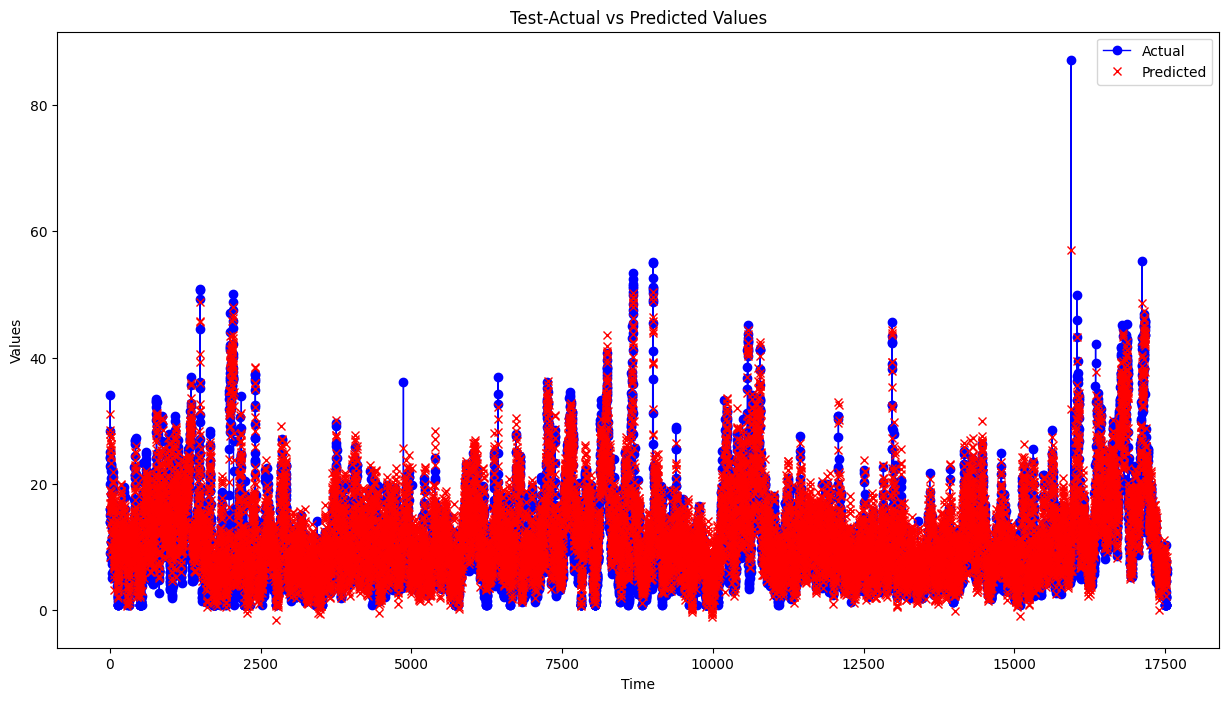

MAE: 2.5410
MSE: 10.8859
RMSE: 3.2994
MAPE: 0.2763
Bias: -1.4947
MASE: 1.4786825491414672
{'Total Data Points': 3652, 'Training Data Size': 2176, 'Validation Data Size': 725, 'Testing Data Size': 726}
{'learning_rate': 0.0005906296261520694, 'num_layers': 5, 'units': [224, 32, 96, 32, 160], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 0.0352 - mean_absolute_error: 0.1377INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 13ms/step - loss: 0.0352 - mean_absolute_error: 0.1377 - val_loss: 0.0093 - val_mean_absolute_error: 0.0662
Epoch 2/10
66/68 [============================>.] - ETA: 0s - loss: 0.0146 - mean_absolute_error: 0.0890INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 11ms/step - loss: 0.0145 - mean_absolute_error: 0.0889 - val_loss: 0.0080 - val_mean_absolute_error: 0.0622
Epoch 3/10
58/68 [========================>.....] - ETA: 0s - loss: 0.0114 - mean_absolute_error: 0.0777INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 12ms/step - loss: 0.0114 - mean_absolute_error: 0.0774 - val_loss: 0.0066 - val_mean_absolute_error: 0.0530
Epoch 4/10
68/68 [==============================] - 1s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0730 - val_loss: 0.0067 - val_mean_absolute_error: 0.0548
Epoch 5/10
63/68 [==========================>...] - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.0687INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 11ms/step - loss: 0.0094 - mean_absolute_error: 0.0684 - val_loss: 0.0066 - val_mean_absolute_error: 0.0524
Epoch 6/10
64/68 [===========================>..] - ETA: 0s - loss: 0.0084 - mean_absolute_error: 0.0641INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0642 - val_loss: 0.0063 - val_mean_absolute_error: 0.0525
Epoch 7/10
66/68 [============================>.] - ETA: 0s - loss: 0.0082 - mean_absolute_error: 0.0624INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 11ms/step - loss: 0.0082 - mean_absolute_error: 0.0623 - val_loss: 0.0056 - val_mean_absolute_error: 0.0479
Epoch 8/10
68/68 [==============================] - 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0620 - val_loss: 0.0060 - val_mean_absolute_error: 0.0509
Epoch 9/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0589 - val_loss: 0.0064 - val_mean_absolute_error: 0.0534
Epoch 10/10
68/68 [==============================] - 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0590 - val_loss: 0.0058 - val_mean_absolute_error: 0.0494
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 216)               0         
                                                                 
 dense_4 (Dense)             (None, 224)               48608     
         

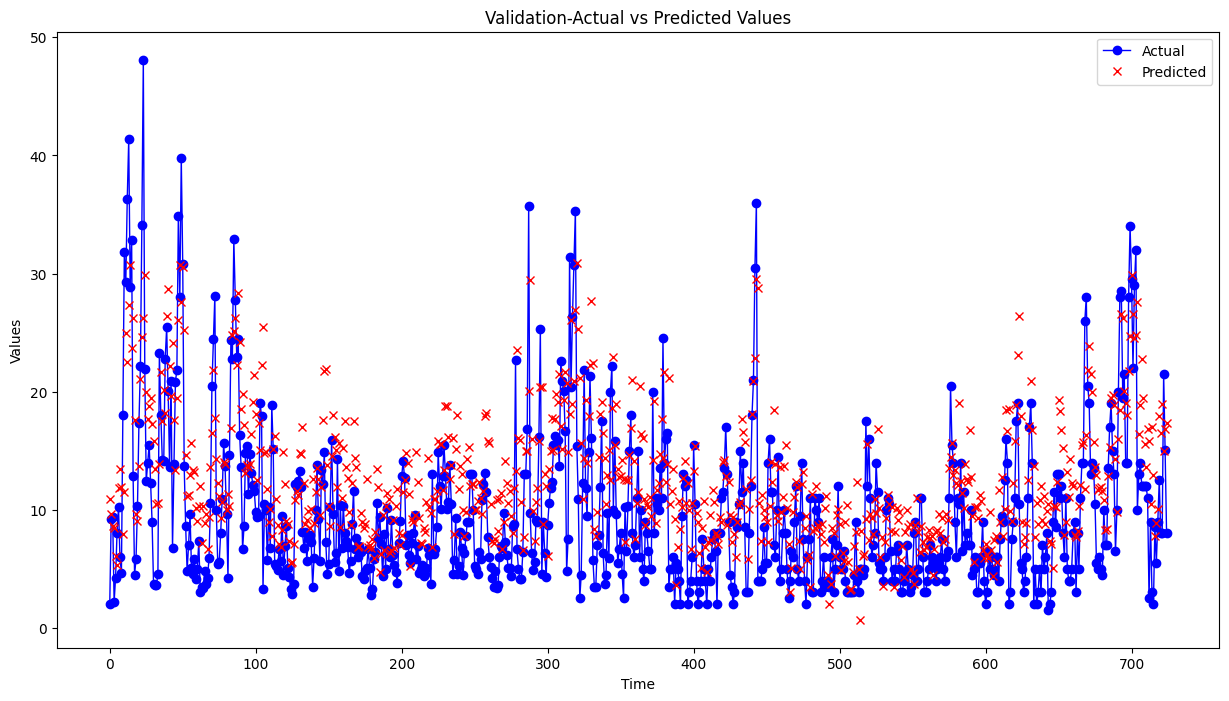

MAE: 4.7678
MSE: 37.1409
RMSE: 6.0943
MAPE: 0.3862
Bias: -2.9769
MASE: 1.5943763974210978
23/23 [==============================] - 0s 2ms/step


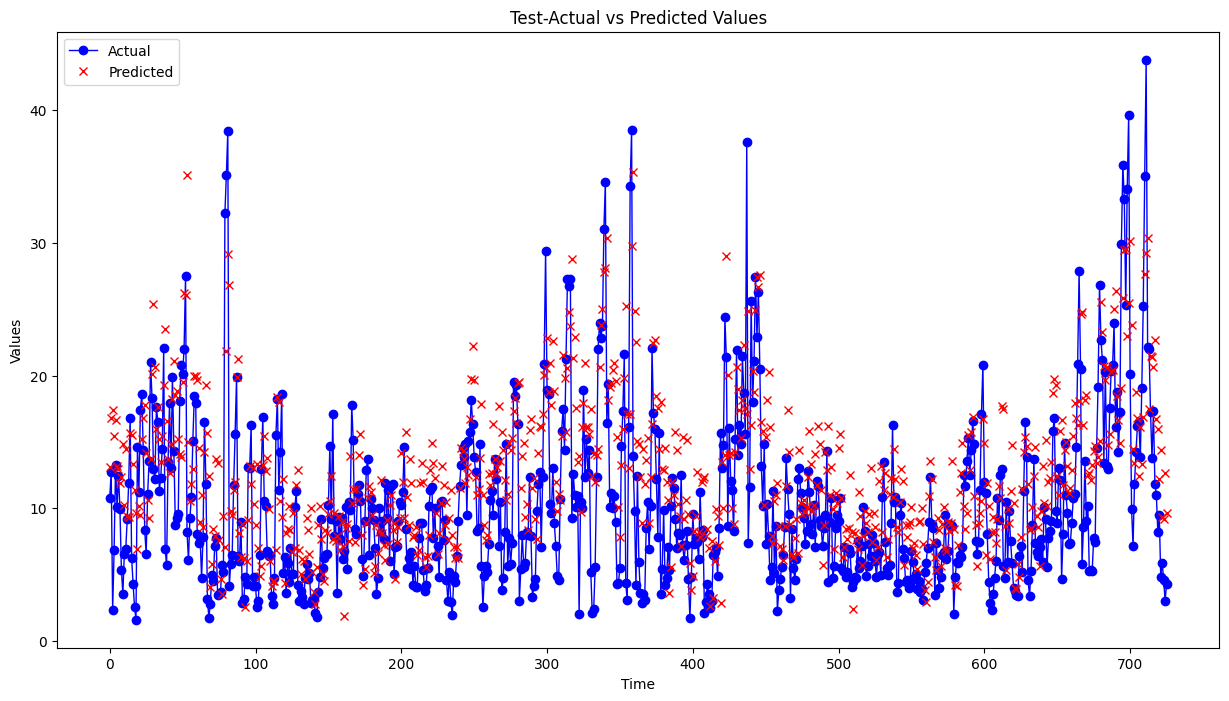

MAE: 4.4448
MSE: 34.6905
RMSE: 5.8899
MAPE: 0.3615
Bias: -2.4868
MASE: 1.4867457988878103
{'Total Data Points': 522, 'Training Data Size': 298, 'Validation Data Size': 99, 'Testing Data Size': 100}
{'learning_rate': 0.0004077726925804003, 'num_layers': 4, 'units': [352, 32, 32, 32], 'activations': ['tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}
Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.1203 - mean_absolute_error: 0.2676INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 1s 52ms/step - loss: 0.1203 - mean_absolute_error: 0.2676 - val_loss: 0.0508 - val_mean_absolute_error: 0.1785
Epoch 2/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0449 - mean_absolute_error: 0.1639INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 37ms/step - loss: 0.0377 - mean_absolute_error: 0.1556 - val_loss: 0.0380 - val_mean_absolute_error: 0.1560
Epoch 3/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0306 - mean_absolute_error: 0.1424INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.1243 - val_loss: 0.0333 - val_mean_absolute_error: 0.1443
Epoch 4/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0277 - mean_absolute_error: 0.1327INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 52ms/step - loss: 0.0214 - mean_absolute_error: 0.1131 - val_loss: 0.0289 - val_mean_absolute_error: 0.1293
Epoch 5/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0186 - mean_absolute_error: 0.1048INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.1012 - val_loss: 0.0262 - val_mean_absolute_error: 0.1226
Epoch 6/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0199 - mean_absolute_error: 0.1055INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0971 - val_loss: 0.0254 - val_mean_absolute_error: 0.1193
Epoch 7/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0167 - mean_absolute_error: 0.0951INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0911 - val_loss: 0.0247 - val_mean_absolute_error: 0.1161
Epoch 8/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0142 - mean_absolute_error: 0.0900INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0882 - val_loss: 0.0242 - val_mean_absolute_error: 0.1148
Epoch 9/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0104 - mean_absolute_error: 0.0784INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0847 - val_loss: 0.0240 - val_mean_absolute_error: 0.1137
Epoch 10/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0131 - mean_absolute_error: 0.0850INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0823 - val_loss: 0.0233 - val_mean_absolute_error: 0.1117
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 216)               0         
                                                                 
 dense_10 (Dense)            (None, 352)               76384     
                                                                 
 dense_11 (Dense)            (None, 32)                11296     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None

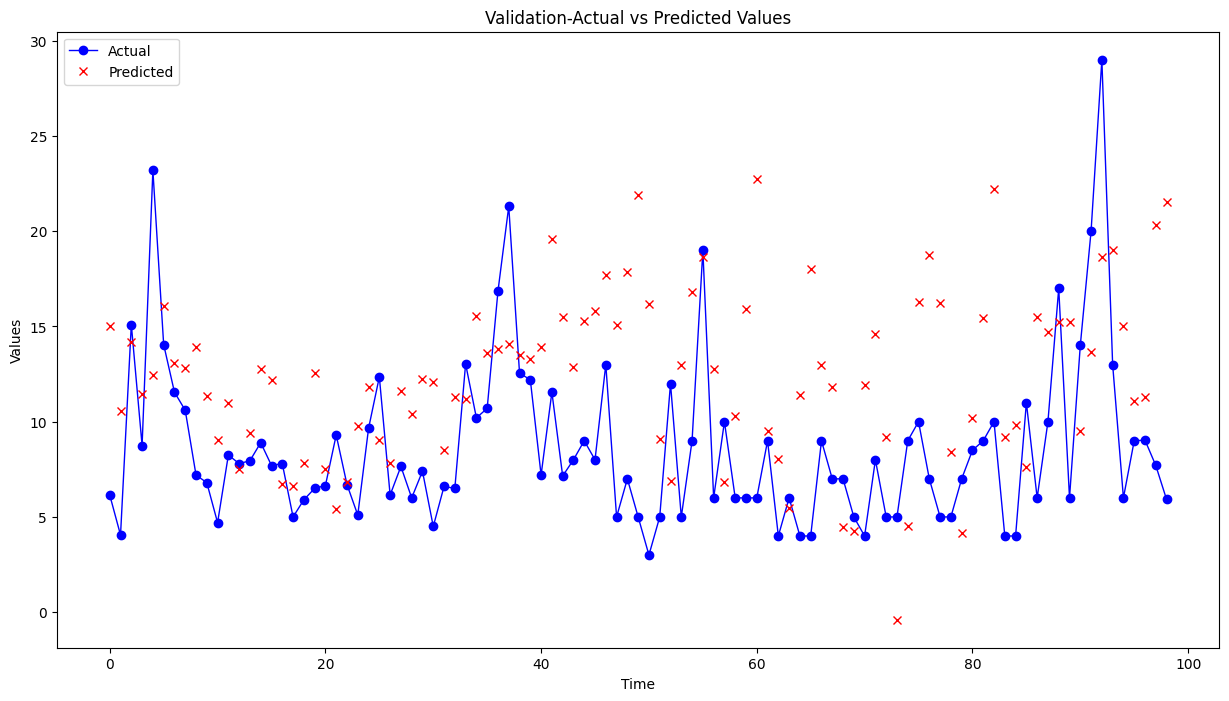

MAE: 5.4206
MSE: 43.7491
RMSE: 6.6143
MAPE: 0.5507
Bias: -3.7282
MASE: 1.5317275626594458
4/4 [==============================] - 0s 6ms/step


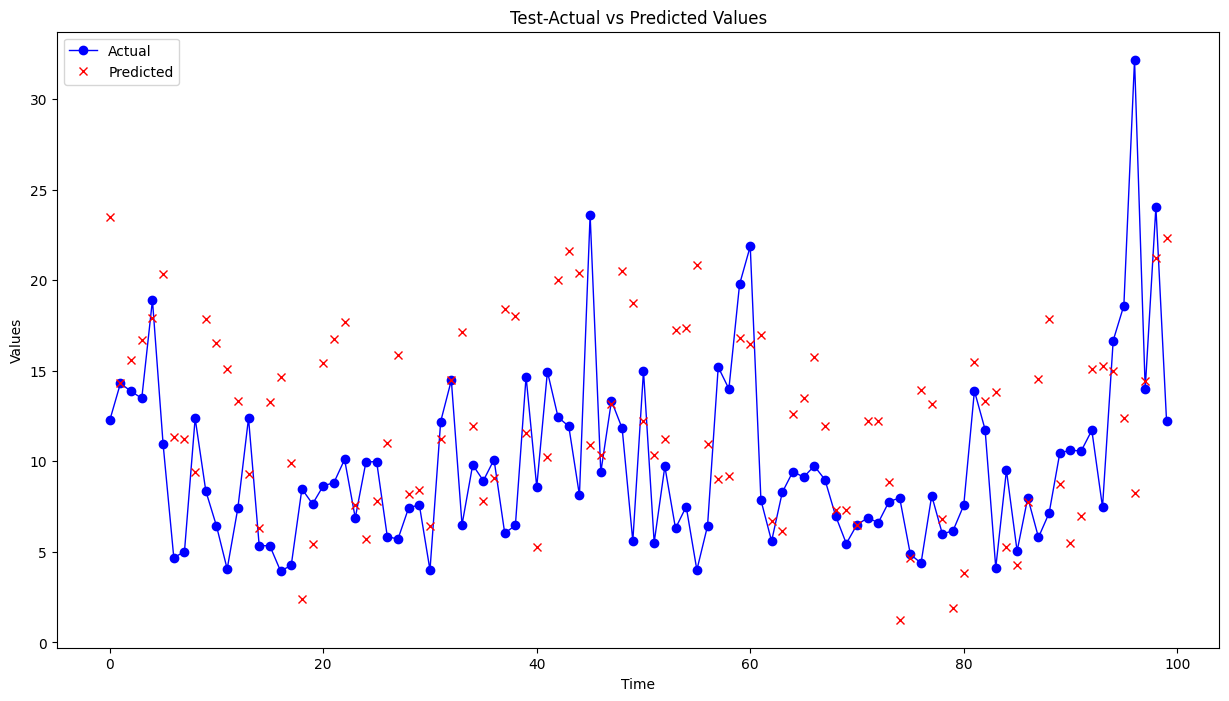

MAE: 5.2946
MSE: 46.4989
RMSE: 6.8190
MAPE: 0.5022
Bias: -2.5249
MASE: 1.3425800259044953
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.0040835753251513085, 'num_layers': 2, 'units': [32, 32], 'activations': ['tanh', 'tanh'], 'dropout': False}
Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 0.6023 - mean_absolute_error: 0.6550INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 1s 420ms/step - loss: 0.4475 - mean_absolute_error: 0.5408 - val_loss: 0.2112 - val_mean_absolute_error: 0.3501
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 0.2012 - mean_absolute_error: 0.3423INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 300ms/step - loss: 0.1843 - mean_absolute_error: 0.3284 - val_loss: 0.1283 - val_mean_absolute_error: 0.2903
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.1276 - mean_absolute_error: 0.2888INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 271ms/step - loss: 0.1138 - mean_absolute_error: 0.2736 - val_loss: 0.1009 - val_mean_absolute_error: 0.2591
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0932 - mean_absolute_error: 0.2511INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 242ms/step - loss: 0.1005 - mean_absolute_error: 0.2495 - val_loss: 0.0955 - val_mean_absolute_error: 0.2356
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0980 - mean_absolute_error: 0.2408INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 230ms/step - loss: 0.0917 - mean_absolute_error: 0.2300 - val_loss: 0.0670 - val_mean_absolute_error: 0.1972
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0701 - mean_absolute_error: 0.2063INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 210ms/step - loss: 0.0663 - mean_absolute_error: 0.1994 - val_loss: 0.0451 - val_mean_absolute_error: 0.1622
Epoch 7/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0526 - mean_absolute_error: 0.1775INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 208ms/step - loss: 0.0492 - mean_absolute_error: 0.1749 - val_loss: 0.0439 - val_mean_absolute_error: 0.1682
Epoch 8/10
2/2 [==============================] - 0s 23ms/step - loss: 0.0441 - mean_absolute_error: 0.1714 - val_loss: 0.0488 - val_mean_absolute_error: 0.1797
Epoch 9/10
2/2 [==============================] - 0s 20ms/step - loss: 0.0423 - mean_absolute_error: 0.1665 - val_loss: 0.0503 - val_mean_absolute_error: 0.1843
Epoch 10/10
2/2 [==============================] - 0s 20ms/step - loss: 0.0417 - mean_absolute_error: 0.1615 - val_loss: 0.0482 - val_mean_absolute_error: 0.1754
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 108)               0         
                                                                 
 dense_15 (Dense)            (None, 32)                3488      
             

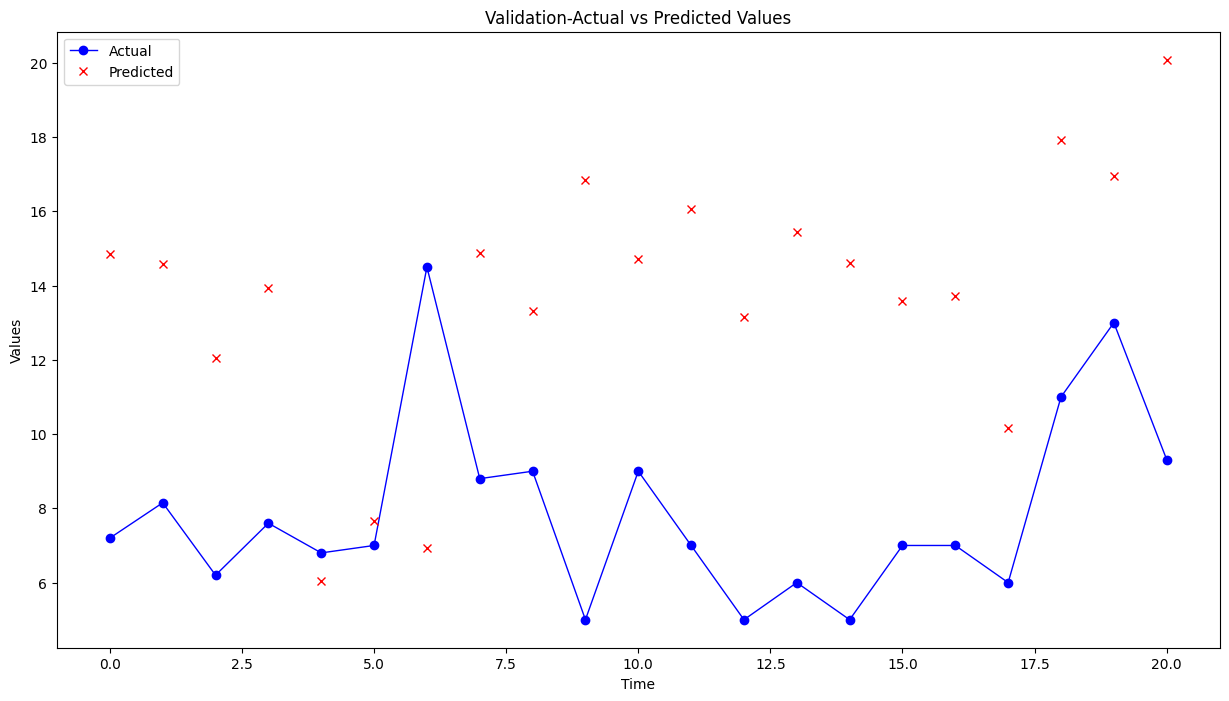

MAE: 6.5991
MSE: 51.2659
RMSE: 7.1600
MAPE: 0.4769
Bias: -5.8063
MASE: 2.444059163422953
1/1 [==============================] - 0s 17ms/step


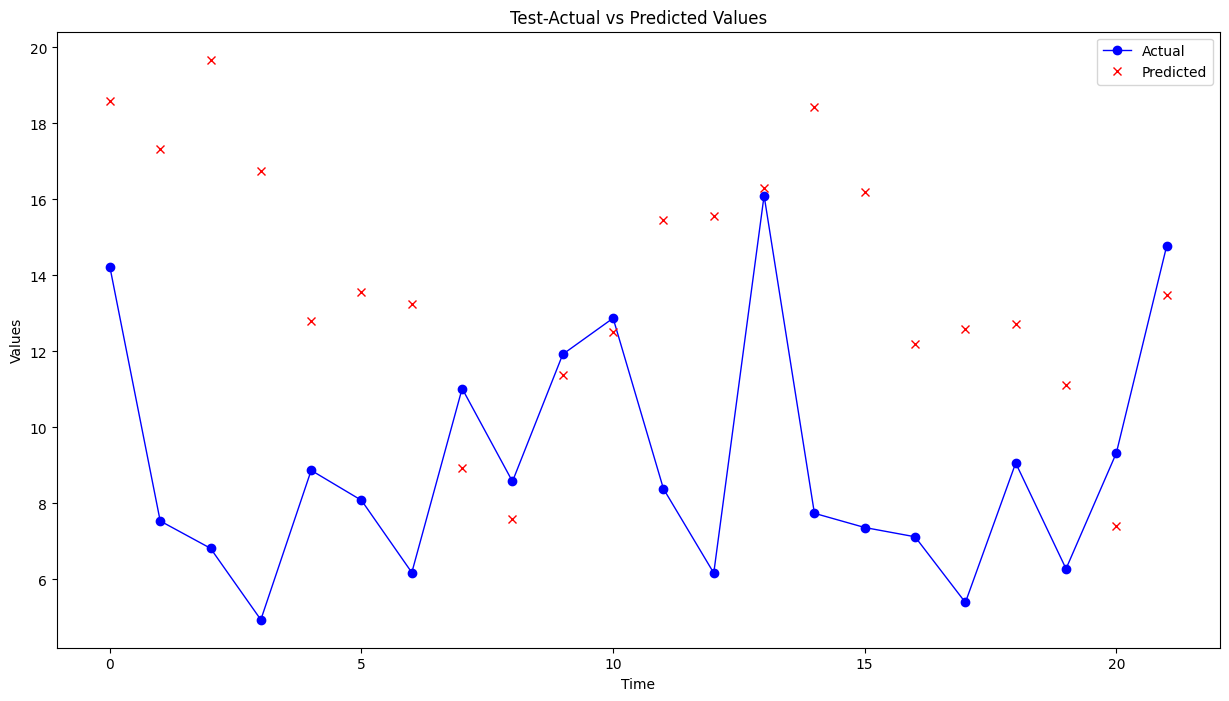

MAE: 5.4307
MSE: 44.1611
RMSE: 6.6454
MAPE: 0.3686
Bias: -4.7752
MASE: 2.466807972088525


In [6]:
# # Train and Evolve

# Hourly
dl.dnn_train_and_evaluate(df_hourly)

# Daily
dl.dnn_train_and_evaluate(df_daily, 'D')

# Weekly
dl.dnn_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.dnn_train_and_evaluate(df_monthly, 'M')


In [7]:
# Hyperparamater Tuning 

# Hourly
# hourly_best_model, hourly_best_hp = dl.dnn_tune_and_evolve(df_hourly)

In [8]:
# # Daily
# daily_best_model, daily_best_hp = dl.dnn_tune_and_evolve(df_daily, 'D')

In [9]:

# # Weekly
# weekly_best_model, weekly_best_hp = dl.dnn_tune_and_evolve(df_weekly, 'W')

In [10]:

# Monthly
# monthly_best_model, monthly_best_hp = dl.dnn_tune_and_evolve(df_monthly, 'M')

# LSTM

* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.00019153080222192724, 'num_layers': 2, 'units': [448, 224], 'activations': ['tanh', 'tanh'], 'dropout': False}
Epoch 1/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0057 - mean_absolute_error: 0.0326INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 26s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0326 - val_loss: 0.0015 - val_mean_absolute_error: 0.0184
Epoch 2/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0163INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 25s 15ms/step - loss: 0.0014 - mean_absolute_error: 0.0163 - val_loss: 0.0011 - val_mean_absolute_error: 0.0135
Epoch 3/10
1641/1643 [============================>.] - ETA: 0s - loss: 0.0010 - mean_absolute_error: 0.0135INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 25s 15ms/step - loss: 0.0010 - mean_absolute_error: 0.0135 - val_loss: 8.4982e-04 - val_mean_absolute_error: 0.0120
Epoch 4/10
1643/1643 [==============================] - ETA: 0s - loss: 9.2933e-04 - mean_absolute_error: 0.0124INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 26s 16ms/step - loss: 9.2933e-04 - mean_absolute_error: 0.0124 - val_loss: 7.5396e-04 - val_mean_absolute_error: 0.0100
Epoch 5/10
1643/1643 [==============================] - 44s 27ms/step - loss: 8.6438e-04 - mean_absolute_error: 0.0117 - val_loss: 8.5978e-04 - val_mean_absolute_error: 0.0117
Epoch 6/10
1643/1643 [==============================] - ETA: 0s - loss: 8.3006e-04 - mean_absolute_error: 0.0110INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 30s 18ms/step - loss: 8.3006e-04 - mean_absolute_error: 0.0110 - val_loss: 7.2237e-04 - val_mean_absolute_error: 0.0094
Epoch 7/10
1643/1643 [==============================] - 34s 21ms/step - loss: 8.1697e-04 - mean_absolute_error: 0.0106 - val_loss: 8.0361e-04 - val_mean_absolute_error: 0.0108
Epoch 8/10
1643/1643 [==============================] - 25s 15ms/step - loss: 7.9073e-04 - mean_absolute_error: 0.0102 - val_loss: 7.2415e-04 - val_mean_absolute_error: 0.0095
Epoch 9/10
1643/1643 [==============================] - ETA: 0s - loss: 7.6992e-04 - mean_absolute_error: 0.0099INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 26s 16ms/step - loss: 7.6992e-04 - mean_absolute_error: 0.0099 - val_loss: 7.1847e-04 - val_mean_absolute_error: 0.0095
Epoch 10/10
1643/1643 [==============================] - ETA: 0s - loss: 7.6164e-04 - mean_absolute_error: 0.0096INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


548/548 [==============================] - 3s 5ms/step


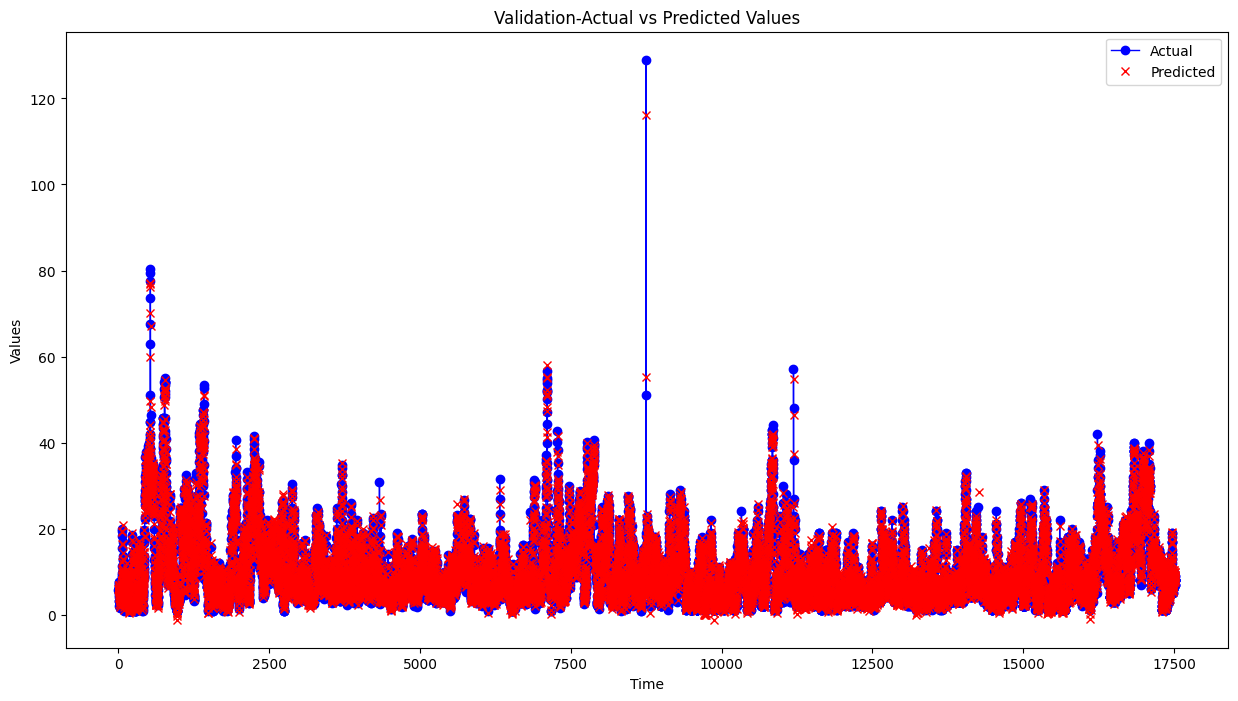

MAE: 1.2432
MSE: 4.2249
RMSE: 2.0554
MAPE: 0.1819
Bias: -0.2368
MASE: 1.0089410568770603
548/548 [==============================] - 3s 5ms/step


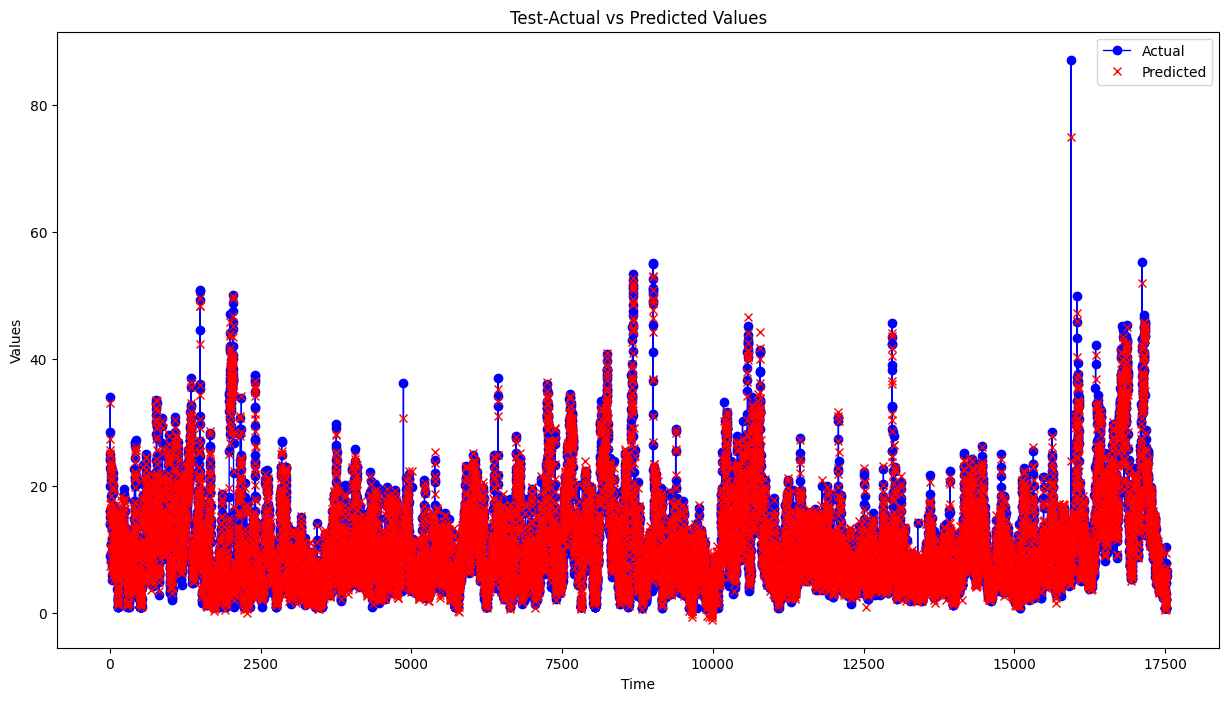

MAE: 1.2448
MSE: 3.8573
RMSE: 1.9640
MAPE: 0.1548
Bias: -0.2101
MASE: 1.0140451766581329
{'Total Data Points': 3652, 'Training Data Size': 2176, 'Validation Data Size': 725, 'Testing Data Size': 726}
{'learning_rate': 0.0028652697828724623, 'num_layers': 3, 'units': [480, 384, 288], 'activations': ['tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
67/68 [============================>.] - ETA: 0s - loss: 0.0368 - mean_absolute_error: 0.1216INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 3s 40ms/step - loss: 0.0364 - mean_absolute_error: 0.1210 - val_loss: 0.0121 - val_mean_absolute_error: 0.0687
Epoch 2/10
64/68 [===========================>..] - ETA: 0s - loss: 0.0132 - mean_absolute_error: 0.0746INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 31ms/step - loss: 0.0132 - mean_absolute_error: 0.0747 - val_loss: 0.0105 - val_mean_absolute_error: 0.0640
Epoch 3/10
68/68 [==============================] - 1s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0712 - val_loss: 0.0110 - val_mean_absolute_error: 0.0625
Epoch 4/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0109 - mean_absolute_error: 0.0673INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0671 - val_loss: 0.0081 - val_mean_absolute_error: 0.0587
Epoch 5/10
68/68 [==============================] - 1s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0597 - val_loss: 0.0081 - val_mean_absolute_error: 0.0530
Epoch 6/10
66/68 [============================>.] - ETA: 0s - loss: 0.0088 - mean_absolute_error: 0.0594INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 32ms/step - loss: 0.0088 - mean_absolute_error: 0.0592 - val_loss: 0.0066 - val_mean_absolute_error: 0.0511
Epoch 7/10
68/68 [==============================] - 1s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0575 - val_loss: 0.0069 - val_mean_absolute_error: 0.0508
Epoch 8/10
68/68 [==============================] - 1s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0569 - val_loss: 0.0068 - val_mean_absolute_error: 0.0508
Epoch 9/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0081 - mean_absolute_error: 0.0570INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 31ms/step - loss: 0.0081 - mean_absolute_error: 0.0569 - val_loss: 0.0064 - val_mean_absolute_error: 0.0475
Epoch 10/10
23/23 [==============================] - 0s 6ms/step


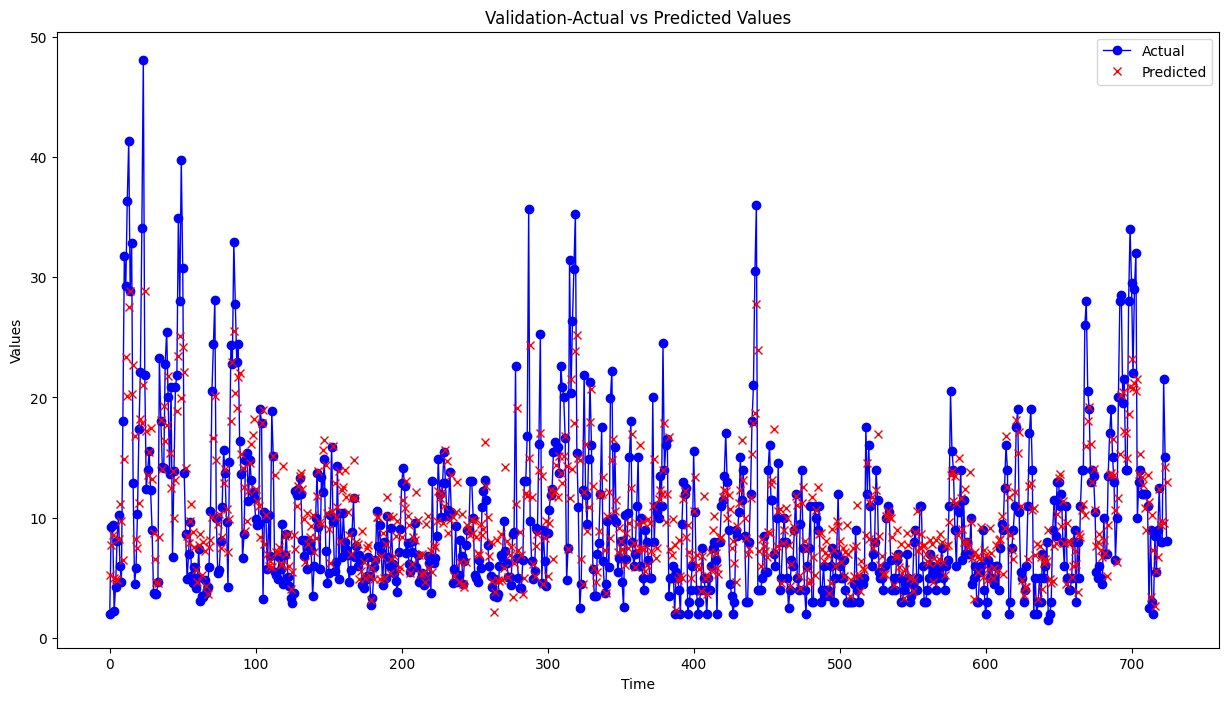

MAE: 3.5535
MSE: 24.0871
RMSE: 4.9079
MAPE: 0.3658
Bias: -0.2349
MASE: 1.267033129070914
23/23 [==============================] - 0s 6ms/step


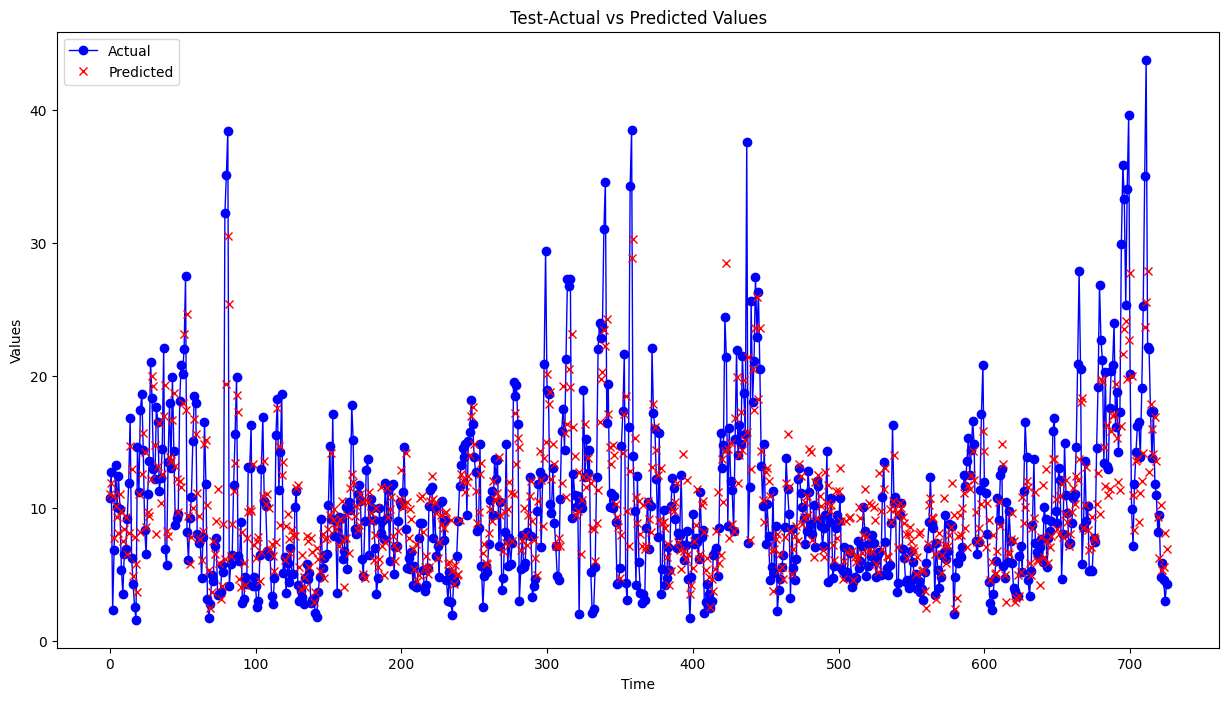

MAE: 3.4696
MSE: 22.9125
RMSE: 4.7867
MAPE: 0.3502
Bias: -0.0591
MASE: 1.2345193909291894
{'Total Data Points': 522, 'Training Data Size': 298, 'Validation Data Size': 99, 'Testing Data Size': 100}
{'learning_rate': 0.0009513380195031257, 'num_layers': 6, 'units': [480, 160, 64, 224, 512, 384], 'activations': ['relu', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.0829 - mean_absolute_error: 0.2127INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 7s 664ms/step - loss: 0.0829 - mean_absolute_error: 0.2127 - val_loss: 0.0633 - val_mean_absolute_error: 0.1919
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.0504 - mean_absolute_error: 0.1666INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 541ms/step - loss: 0.0504 - mean_absolute_error: 0.1666 - val_loss: 0.0472 - val_mean_absolute_error: 0.1648
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.0402 - mean_absolute_error: 0.1497INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 6s 586ms/step - loss: 0.0402 - mean_absolute_error: 0.1497 - val_loss: 0.0428 - val_mean_absolute_error: 0.1544
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.0318 - mean_absolute_error: 0.1359INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 560ms/step - loss: 0.0318 - mean_absolute_error: 0.1359 - val_loss: 0.0324 - val_mean_absolute_error: 0.1351
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.0223 - mean_absolute_error: 0.1154INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 539ms/step - loss: 0.0223 - mean_absolute_error: 0.1154 - val_loss: 0.0316 - val_mean_absolute_error: 0.1358
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.0189 - mean_absolute_error: 0.1044INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 542ms/step - loss: 0.0189 - mean_absolute_error: 0.1044 - val_loss: 0.0257 - val_mean_absolute_error: 0.1204
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.0164 - mean_absolute_error: 0.0943INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 6s 574ms/step - loss: 0.0164 - mean_absolute_error: 0.0943 - val_loss: 0.0232 - val_mean_absolute_error: 0.1116
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.0157 - mean_absolute_error: 0.0916INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 553ms/step - loss: 0.0157 - mean_absolute_error: 0.0916 - val_loss: 0.0212 - val_mean_absolute_error: 0.1048
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.0152 - mean_absolute_error: 0.0880INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 537ms/step - loss: 0.0152 - mean_absolute_error: 0.0880 - val_loss: 0.0212 - val_mean_absolute_error: 0.0994
Epoch 10/10
10/10 [==============================] - ETA: 0s - loss: 0.0148 - mean_absolute_error: 0.0881INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 558ms/step - loss: 0.0148 - mean_absolute_error: 0.0881 - val_loss: 0.0200 - val_mean_absolute_error: 0.1001


4/4 [==============================] - 0s 48ms/step


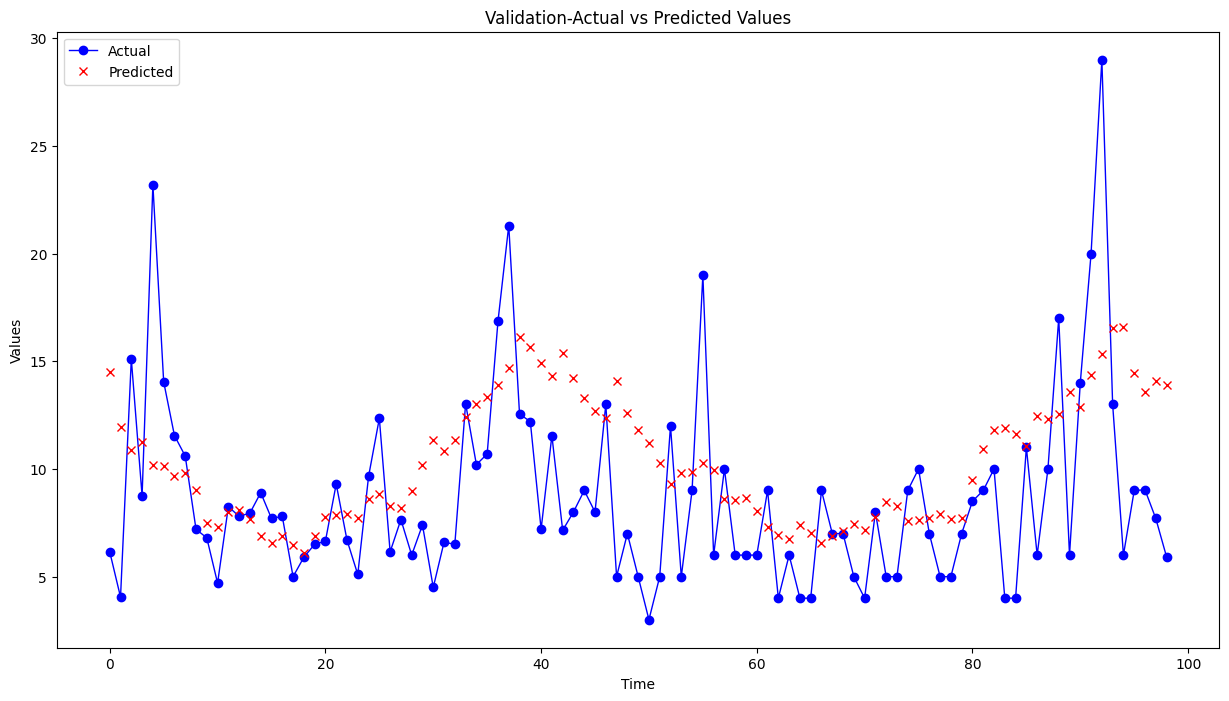

MAE: 3.5318
MSE: 20.7789
RMSE: 4.5584
MAPE: 0.3190
Bias: -1.6895
MASE: 5.480200473415156
4/4 [==============================] - 0s 51ms/step


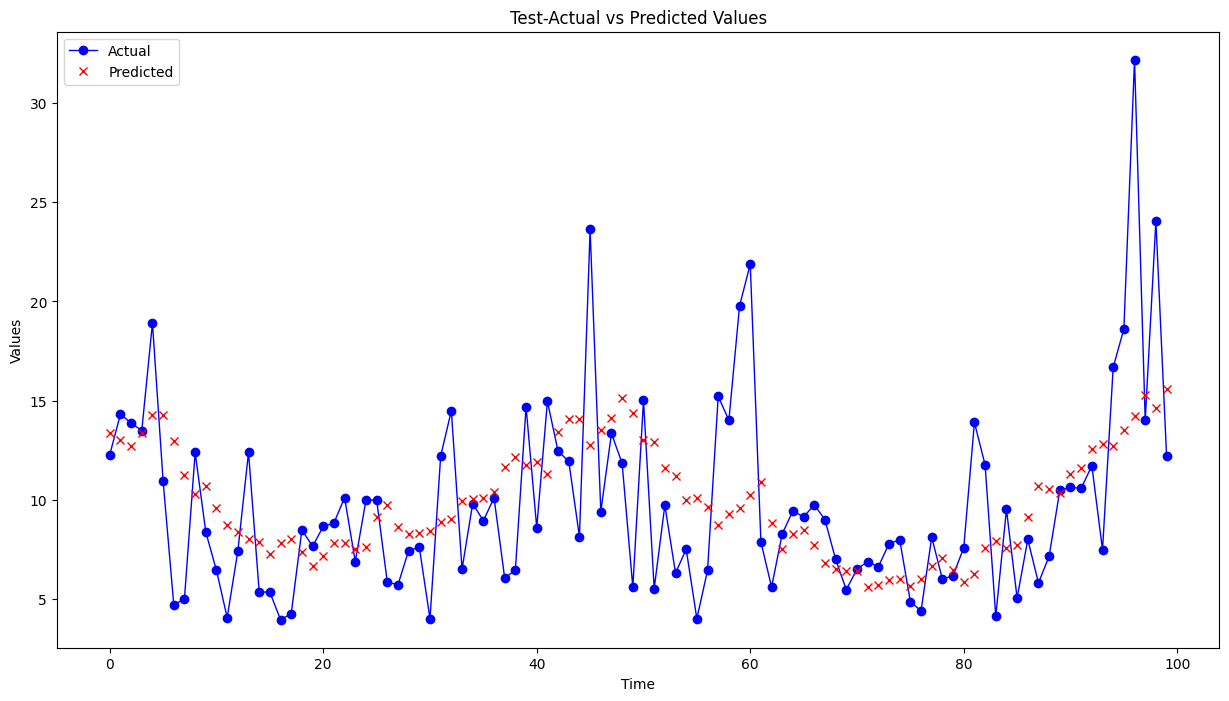

MAE: 3.1847
MSE: 18.5052
RMSE: 4.3018
MAPE: 0.3155
Bias: -0.1455
MASE: 5.172467208251344
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.0013383290456424192, 'num_layers': 5, 'units': [288, 352, 480, 224, 192], 'activations': ['relu', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}


Epoch 1/10
2/2 [==============================] - ETA: 0s - loss: 0.1705 - mean_absolute_error: 0.3226INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 2s 1s/step - loss: 0.1705 - mean_absolute_error: 0.3226 - val_loss: 0.0911 - val_mean_absolute_error: 0.2592
Epoch 2/10
2/2 [==============================] - ETA: 0s - loss: 0.0924 - mean_absolute_error: 0.2464INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 769ms/step - loss: 0.0924 - mean_absolute_error: 0.2464 - val_loss: 0.0766 - val_mean_absolute_error: 0.2181
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 0.0762 - mean_absolute_error: 0.2209INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 992ms/step - loss: 0.0762 - mean_absolute_error: 0.2209 - val_loss: 0.0708 - val_mean_absolute_error: 0.2130
Epoch 4/10
2/2 [==============================] - ETA: 0s - loss: 0.0559 - mean_absolute_error: 0.1875INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 923ms/step - loss: 0.0559 - mean_absolute_error: 0.1875 - val_loss: 0.0416 - val_mean_absolute_error: 0.1637
Epoch 5/10
2/2 [==============================] - ETA: 0s - loss: 0.0440 - mean_absolute_error: 0.1674INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 806ms/step - loss: 0.0440 - mean_absolute_error: 0.1674 - val_loss: 0.0323 - val_mean_absolute_error: 0.1327
Epoch 6/10
2/2 [==============================] - ETA: 0s - loss: 0.0401 - mean_absolute_error: 0.1517INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 759ms/step - loss: 0.0401 - mean_absolute_error: 0.1517 - val_loss: 0.0279 - val_mean_absolute_error: 0.1263
Epoch 7/10
2/2 [==============================] - 0s 122ms/step - loss: 0.0305 - mean_absolute_error: 0.1351 - val_loss: 0.0348 - val_mean_absolute_error: 0.1458
Epoch 8/10
2/2 [==============================] - 0s 133ms/step - loss: 0.0281 - mean_absolute_error: 0.1293 - val_loss: 0.0368 - val_mean_absolute_error: 0.1539
Epoch 9/10
2/2 [==============================] - 0s 117ms/step - loss: 0.0286 - mean_absolute_error: 0.1288 - val_loss: 0.0420 - val_mean_absolute_error: 0.1672
Epoch 10/10
2/2 [==============================] - 0s 113ms/step - loss: 0.0288 - mean_absolute_error: 0.1302 - val_loss: 0.0323 - val_mean_absolute_error: 0.1438


1/1 [==============================] - 0s 120ms/step


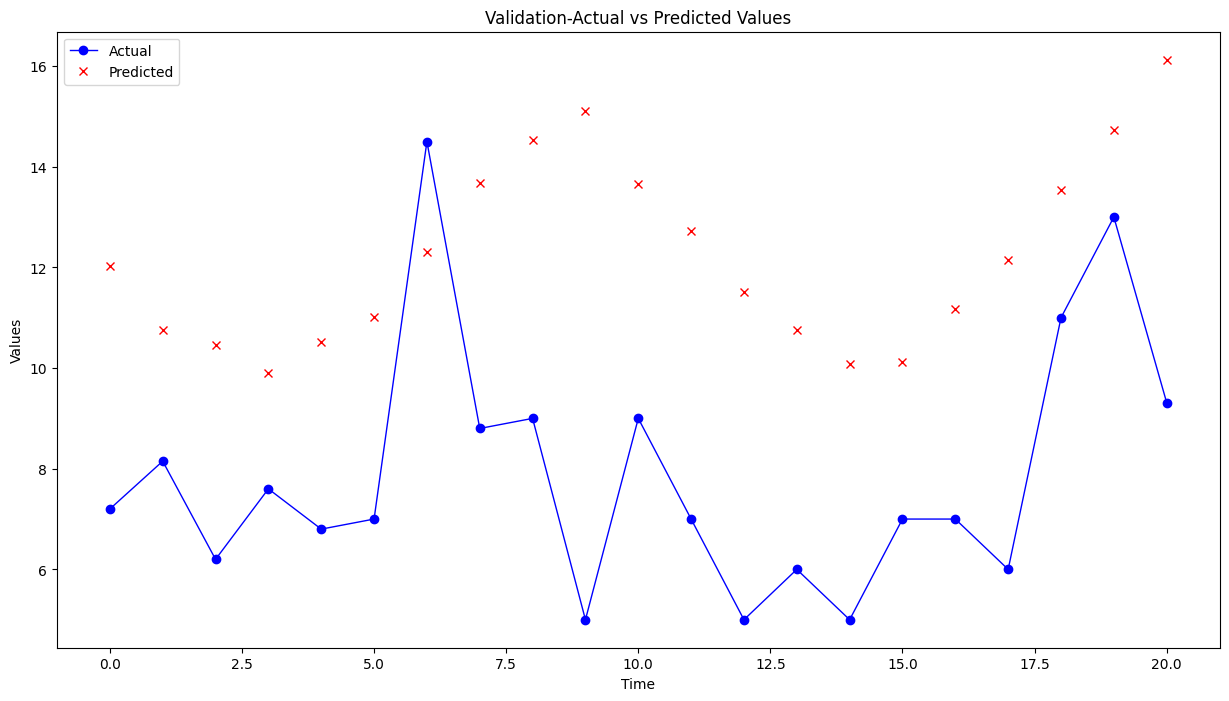

MAE: 4.5566
MSE: 24.3341
RMSE: 4.9330
MAPE: 0.3716
Bias: -4.3477
MASE: 4.946875422911366
1/1 [==============================] - 0s 50ms/step


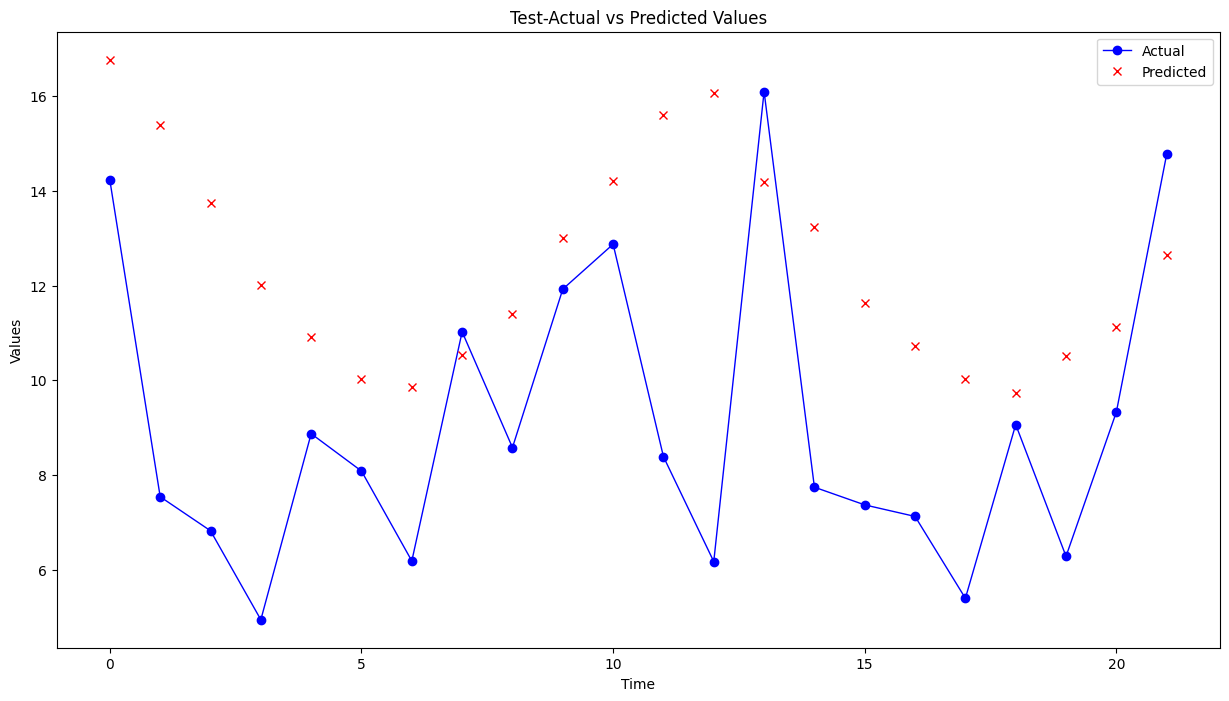

MAE: 3.8073
MSE: 21.0221
RMSE: 4.5850
MAPE: 0.2992
Bias: -3.3941
MASE: 3.5713777846475234


In [11]:
# # Train and Evolve

# Hourly
dl.lstm_train_and_evaluate(df_hourly)

# Daily
dl.lstm_train_and_evaluate(df_daily, 'D')

# Weekly
dl.lstm_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.lstm_train_and_evaluate(df_monthly, 'M')


In [12]:
# Hyperparamater Tuning 

# # Hourly
# hourly_best_model, hourly_best_hp = dl.lstm_tune_and_evolve(df_hourly)

In [13]:

# # Daily
#daily_best_model, daily_best_hp = dl.lstm_tune_and_evolve(df_daily, 'D')

In [21]:

# # Weekly
# weekly_best_model, weekly_best_hp = dl.lstm_tune_and_evolve(df_weekly, 'W')

In [15]:

# # Monthly
# monthly_best_model, monthly_best_hp = dl.lstm_tune_and_evolve(df_monthly, 'M')

# CNN 

* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.00021997838024224393, 'num_layers': 2, 'units': [224, 256], 'activations': ['relu', 'tanh'], 'dropout': False}
Epoch 1/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0246INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 11s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0246 - val_loss: 9.7087e-04 - val_mean_absolute_error: 0.0155
Epoch 2/10
1643/1643 [==============================] - 26s 16ms/step - loss: 0.0011 - mean_absolute_error: 0.0167 - val_loss: 9.7533e-04 - val_mean_absolute_error: 0.0158
Epoch 3/10
1641/1643 [============================>.] - ETA: 0s - loss: 9.7125e-04 - mean_absolute_error: 0.0148INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 11s 7ms/step - loss: 9.7069e-04 - mean_absolute_error: 0.0148 - val_loss: 9.3060e-04 - val_mean_absolute_error: 0.0139
Epoch 4/10
1641/1643 [============================>.] - ETA: 0s - loss: 8.9990e-04 - mean_absolute_error: 0.0136INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 8.9945e-04 - mean_absolute_error: 0.0136 - val_loss: 9.0462e-04 - val_mean_absolute_error: 0.0140
Epoch 5/10
1639/1643 [============================>.] - ETA: 0s - loss: 8.6907e-04 - mean_absolute_error: 0.0130INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 8.6814e-04 - mean_absolute_error: 0.0130 - val_loss: 7.7190e-04 - val_mean_absolute_error: 0.0110
Epoch 6/10
1643/1643 [==============================] - 10s 6ms/step - loss: 8.2589e-04 - mean_absolute_error: 0.0123 - val_loss: 7.9943e-04 - val_mean_absolute_error: 0.0129
Epoch 7/10
1642/1643 [============================>.] - ETA: 0s - loss: 7.9870e-04 - mean_absolute_error: 0.0119INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 7.9851e-04 - mean_absolute_error: 0.0119 - val_loss: 7.2880e-04 - val_mean_absolute_error: 0.0103
Epoch 8/10
1643/1643 [==============================] - 10s 6ms/step - loss: 7.7306e-04 - mean_absolute_error: 0.0115 - val_loss: 7.4479e-04 - val_mean_absolute_error: 0.0113
Epoch 9/10
1638/1643 [============================>.] - ETA: 0s - loss: 7.4320e-04 - mean_absolute_error: 0.0112INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 7.4321e-04 - mean_absolute_error: 0.0112 - val_loss: 7.0102e-04 - val_mean_absolute_error: 0.0100
Epoch 10/10
1637/1643 [============================>.] - ETA: 0s - loss: 7.2324e-04 - mean_absolute_error: 0.0110INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


548/548 [==============================] - 1s 2ms/step


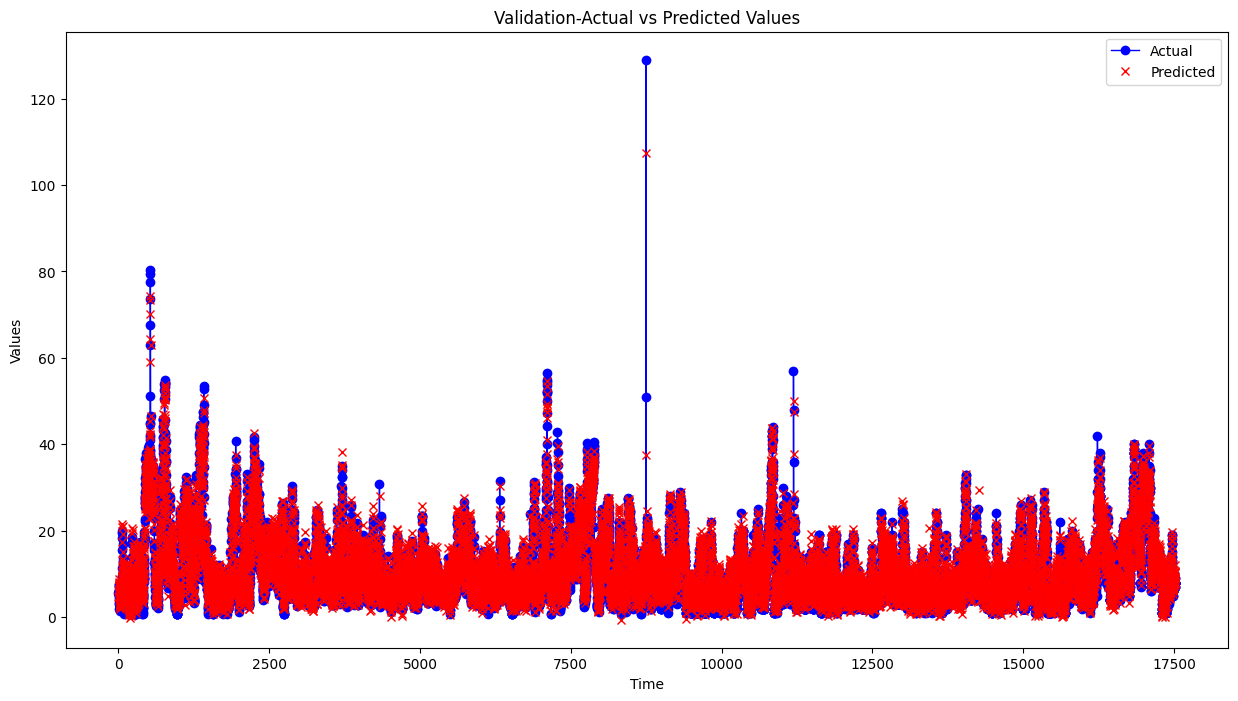

MAE: 1.7580
MSE: 6.2403
RMSE: 2.4981
MAPE: 0.2181
Bias: -0.9264
MASE: 0.9532695874577422
548/548 [==============================] - 1s 2ms/step


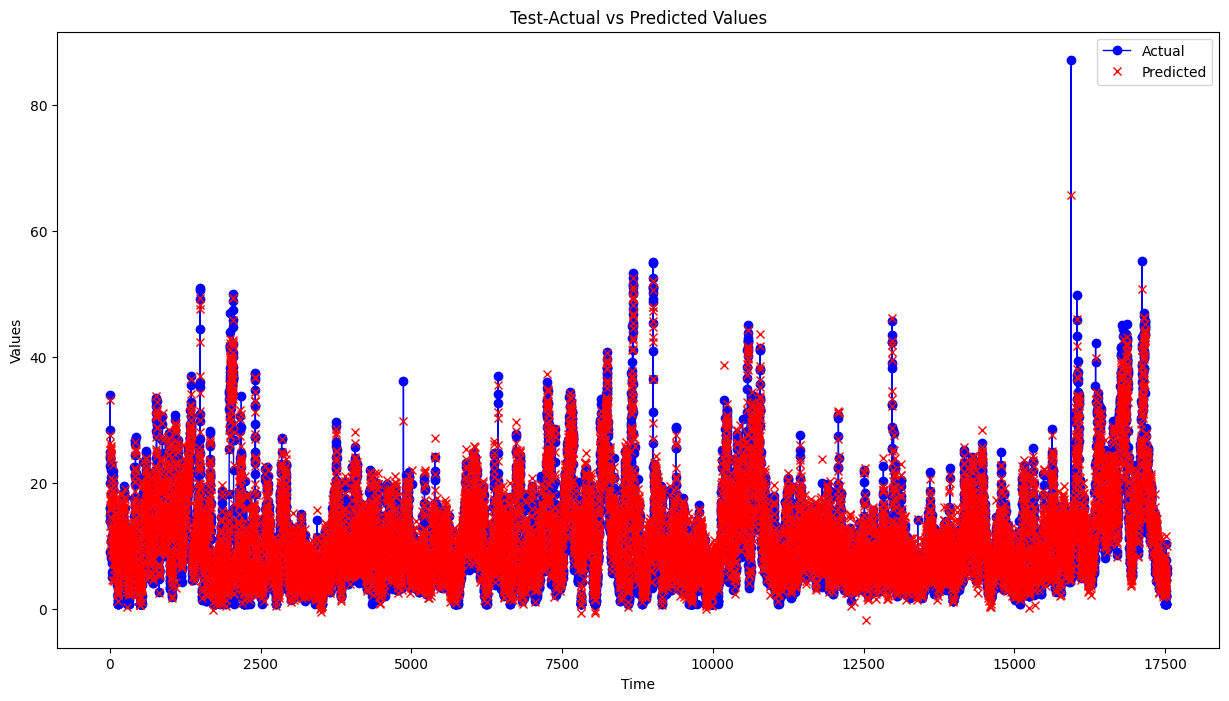

MAE: 1.7771
MSE: 5.8637
RMSE: 2.4215
MAPE: 0.2020
Bias: -0.9158
MASE: 0.9559152931279851
{'Total Data Points': 3652, 'Training Data Size': 2176, 'Validation Data Size': 725, 'Testing Data Size': 726}
{'learning_rate': 0.0012918827423762096, 'num_layers': 5, 'units': [96, 448, 96, 512, 320], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
59/68 [=========================>....] - ETA: 0s - loss: 0.1075 - mean_absolute_error: 0.2103INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 15ms/step - loss: 0.0956 - mean_absolute_error: 0.1958 - val_loss: 0.0115 - val_mean_absolute_error: 0.0821
Epoch 2/10
63/68 [==========================>...] - ETA: 0s - loss: 0.0139 - mean_absolute_error: 0.0880INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 12ms/step - loss: 0.0139 - mean_absolute_error: 0.0878 - val_loss: 0.0092 - val_mean_absolute_error: 0.0702
Epoch 3/10
68/68 [==============================] - 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0917 - val_loss: 0.0115 - val_mean_absolute_error: 0.0765
Epoch 4/10
68/68 [==============================] - 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0772 - val_loss: 0.0106 - val_mean_absolute_error: 0.0774
Epoch 5/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0099 - mean_absolute_error: 0.0713INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 12ms/step - loss: 0.0099 - mean_absolute_error: 0.0711 - val_loss: 0.0090 - val_mean_absolute_error: 0.0665
Epoch 6/10
61/68 [=========================>....] - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.0710INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 13ms/step - loss: 0.0098 - mean_absolute_error: 0.0717 - val_loss: 0.0077 - val_mean_absolute_error: 0.0605
Epoch 7/10
63/68 [==========================>...] - ETA: 0s - loss: 0.0099 - mean_absolute_error: 0.0716INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 12ms/step - loss: 0.0098 - mean_absolute_error: 0.0709 - val_loss: 0.0077 - val_mean_absolute_error: 0.0608
Epoch 8/10
66/68 [============================>.] - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.0678INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 12ms/step - loss: 0.0090 - mean_absolute_error: 0.0677 - val_loss: 0.0060 - val_mean_absolute_error: 0.0494
Epoch 9/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0653 - val_loss: 0.0076 - val_mean_absolute_error: 0.0607
Epoch 10/10
23/23 [==============================] - 0s 3ms/step


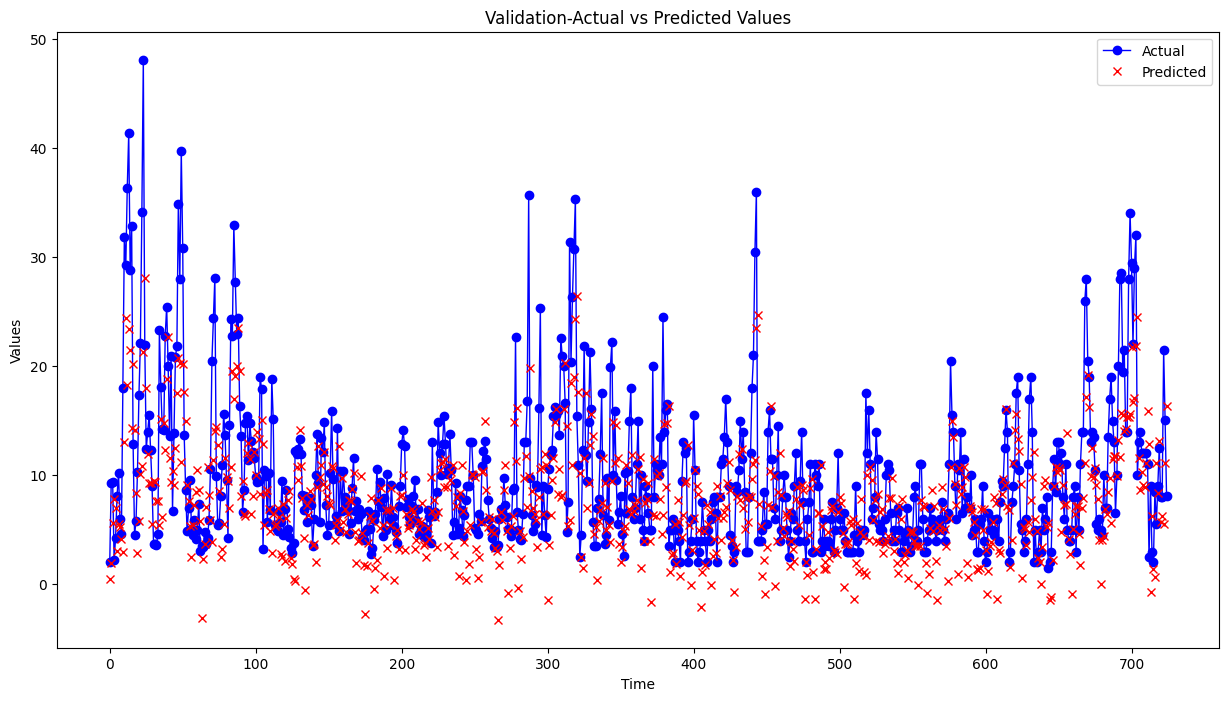

MAE: 4.4102
MSE: 36.7510
RMSE: 6.0623
MAPE: 2.0157
Bias: 2.2332
MASE: 1.3247198384474872
23/23 [==============================] - 0s 3ms/step


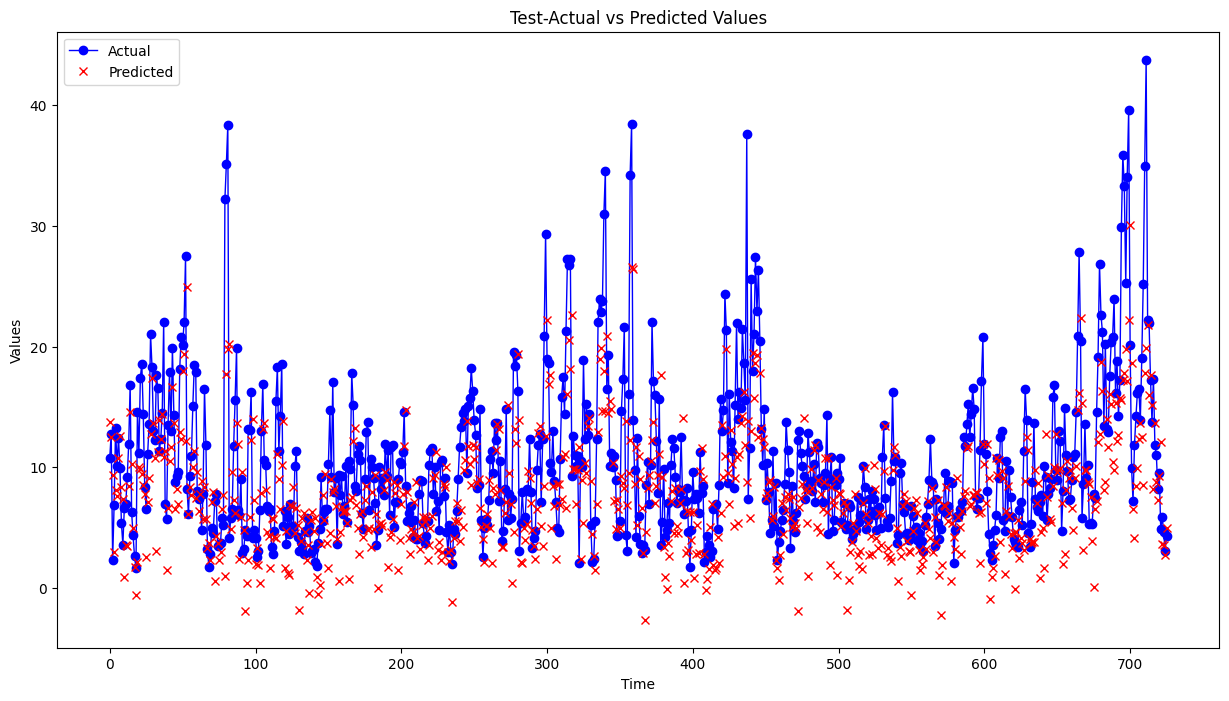

MAE: 4.2696
MSE: 33.8639
RMSE: 5.8193
MAPE: 4.7521
Bias: 2.5676
MASE: 1.315581993514375
{'Total Data Points': 522, 'Training Data Size': 298, 'Validation Data Size': 99, 'Testing Data Size': 100}
{'learning_rate': 0.0031087381681937547, 'num_layers': 4, 'units': [96, 32, 96, 96], 'activations': ['tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.1668 - mean_absolute_error: 0.3241INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 1s 70ms/step - loss: 0.1668 - mean_absolute_error: 0.3241 - val_loss: 0.0435 - val_mean_absolute_error: 0.1639
Epoch 2/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0560 - mean_absolute_error: 0.1855INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 44ms/step - loss: 0.0558 - mean_absolute_error: 0.1852 - val_loss: 0.0312 - val_mean_absolute_error: 0.1328
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.0340 - mean_absolute_error: 0.1430INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 42ms/step - loss: 0.0340 - mean_absolute_error: 0.1430 - val_loss: 0.0250 - val_mean_absolute_error: 0.1208
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.0248 - mean_absolute_error: 0.1209INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 42ms/step - loss: 0.0248 - mean_absolute_error: 0.1209 - val_loss: 0.0214 - val_mean_absolute_error: 0.1084
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.0198 - mean_absolute_error: 0.1088INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 53ms/step - loss: 0.0198 - mean_absolute_error: 0.1088 - val_loss: 0.0204 - val_mean_absolute_error: 0.1095
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0178 - mean_absolute_error: 0.1005 - val_loss: 0.0228 - val_mean_absolute_error: 0.1212
Epoch 7/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0176 - mean_absolute_error: 0.0999INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 43ms/step - loss: 0.0174 - mean_absolute_error: 0.0997 - val_loss: 0.0195 - val_mean_absolute_error: 0.1077
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.0165 - mean_absolute_error: 0.0976INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 42ms/step - loss: 0.0165 - mean_absolute_error: 0.0976 - val_loss: 0.0150 - val_mean_absolute_error: 0.0877
Epoch 9/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0154 - mean_absolute_error: 0.0939 - val_loss: 0.0164 - val_mean_absolute_error: 0.0961
Epoch 10/10
4/4 [==============================] - 0s 7ms/step


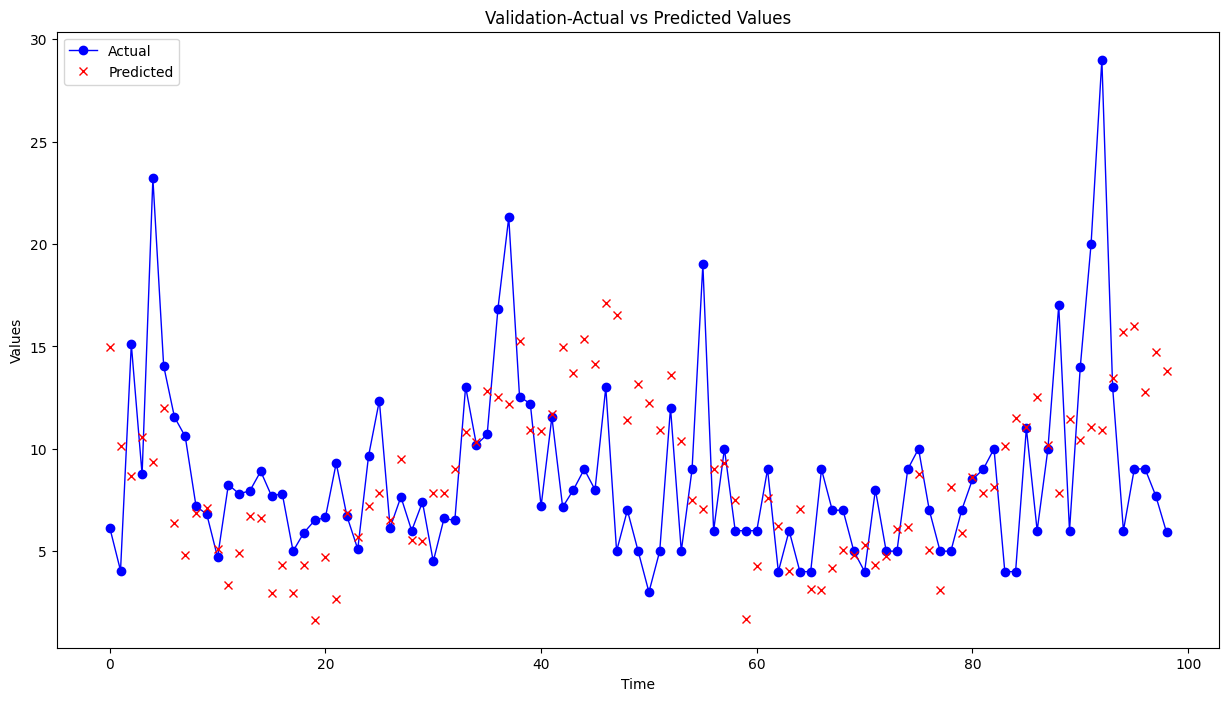

MAE: 3.8114
MSE: 25.7378
RMSE: 5.0732
MAPE: 0.5152
Bias: -0.0230
MASE: 2.024644687690396
4/4 [==============================] - 0s 9ms/step


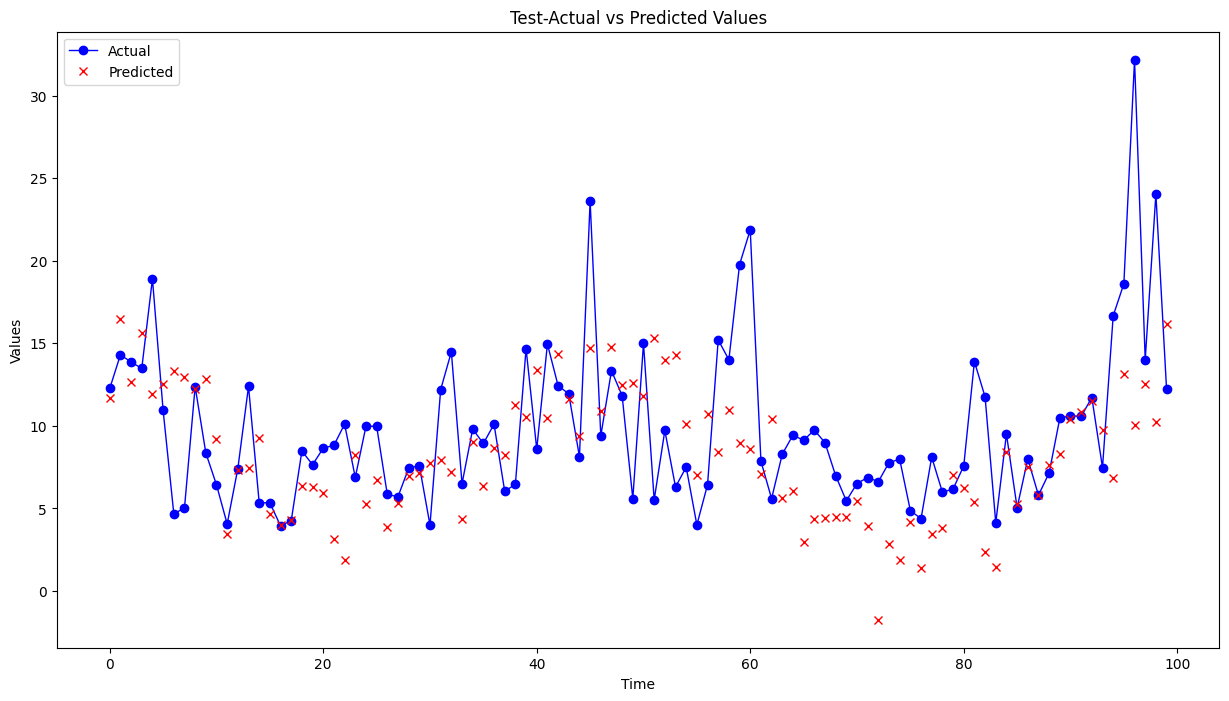

MAE: 3.6848
MSE: 26.3835
RMSE: 5.1365
MAPE: 0.6337
Bias: 1.4963
MASE: 1.6334054878632844
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.0009974518412524185, 'num_layers': 5, 'units': [64, 448, 256, 64, 416], 'activations': ['relu', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 0.4104 - mean_absolute_error: 0.5305INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 1s 471ms/step - loss: 0.2994 - mean_absolute_error: 0.4434 - val_loss: 0.1227 - val_mean_absolute_error: 0.2990
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 0.1527 - mean_absolute_error: 0.3244INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 374ms/step - loss: 0.1266 - mean_absolute_error: 0.2904 - val_loss: 0.0556 - val_mean_absolute_error: 0.1832
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0913 - mean_absolute_error: 0.2396INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 380ms/step - loss: 0.1078 - mean_absolute_error: 0.2635 - val_loss: 0.0545 - val_mean_absolute_error: 0.1863
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0832 - mean_absolute_error: 0.2312INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 387ms/step - loss: 0.0702 - mean_absolute_error: 0.2094 - val_loss: 0.0407 - val_mean_absolute_error: 0.1518
Epoch 5/10
2/2 [==============================] - 0s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.1977 - val_loss: 0.0513 - val_mean_absolute_error: 0.1644
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.1987INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 384ms/step - loss: 0.0626 - mean_absolute_error: 0.1963 - val_loss: 0.0350 - val_mean_absolute_error: 0.1442
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 0.0461 - mean_absolute_error: 0.1645 - val_loss: 0.0386 - val_mean_absolute_error: 0.1501
Epoch 8/10
2/2 [==============================] - 0s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.1666 - val_loss: 0.0392 - val_mean_absolute_error: 0.1467
Epoch 9/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0502 - mean_absolute_error: 0.1733INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 383ms/step - loss: 0.0446 - mean_absolute_error: 0.1633 - val_loss: 0.0298 - val_mean_absolute_error: 0.1321
Epoch 10/10
1/1 [==============================] - 0s 54ms/step


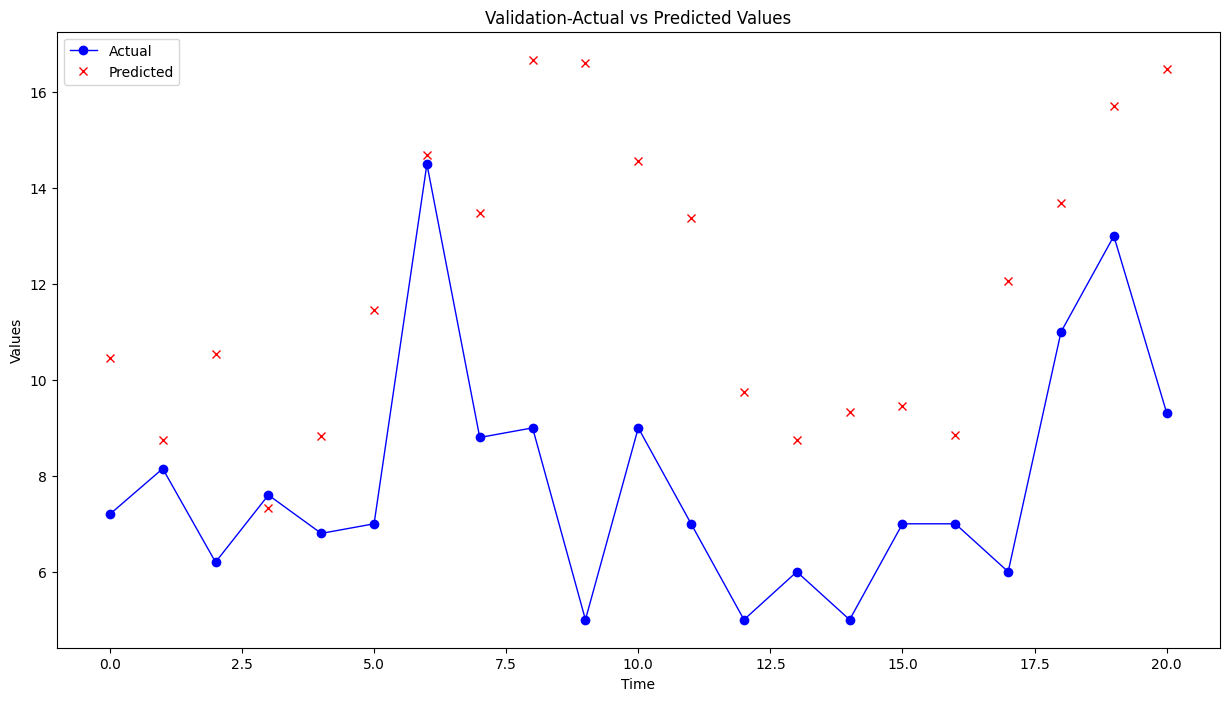

MAE: 4.0876
MSE: 23.9243
RMSE: 4.8913
MAPE: 0.3271
Bias: -4.0612
MASE: 2.3124826388095974
1/1 [==============================] - 0s 34ms/step


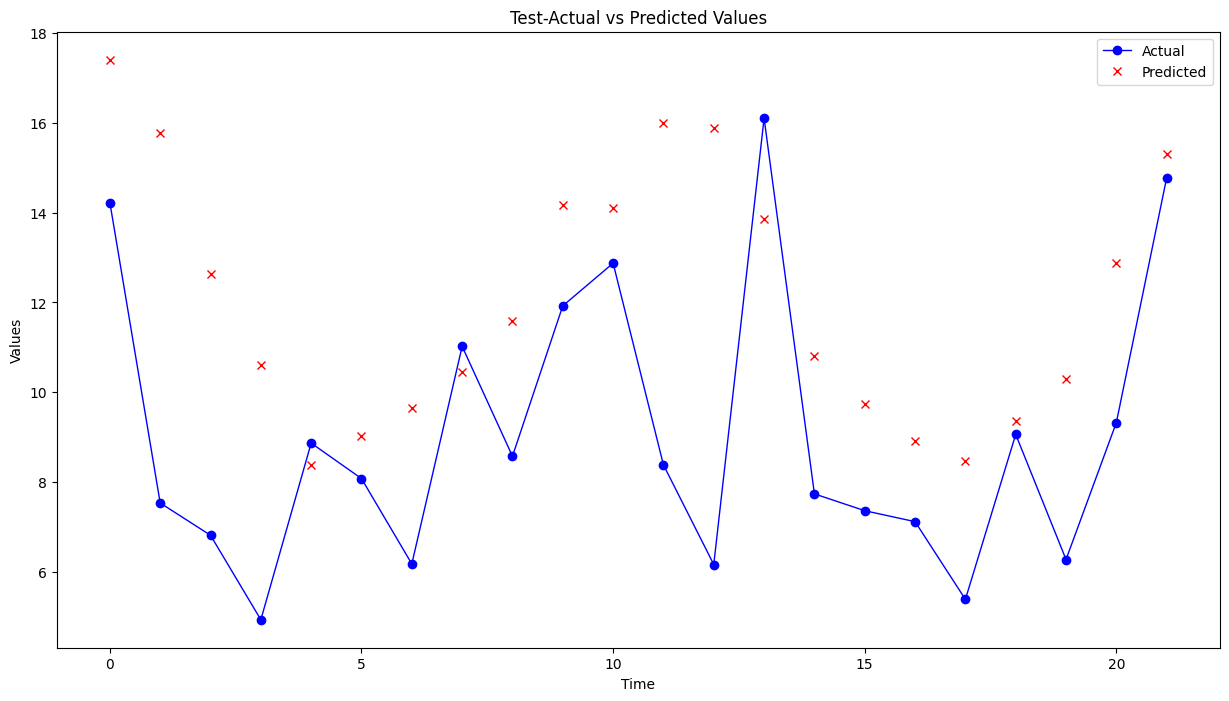

MAE: 3.3258
MSE: 17.6107
RMSE: 4.1965
MAPE: 0.2663
Bias: -3.0233
MASE: 2.24435604957175


In [16]:
# Train and Evolve

# Hourly
dl.cnn_train_and_evaluate(df_hourly)

# Daily
dl.cnn_train_and_evaluate(df_daily, 'D')

# Weekly
dl.cnn_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.cnn_train_and_evaluate(df_monthly, 'M')

In [17]:
# Hyperparamater Tuning 

# # Hourly
# hourly_best_model, hourly_best_hp = dl.cnn_tune_and_evolve(df_hourly)

In [18]:
# # Daily
#daily_best_model, daily_best_hp = dl.cnn_tune_and_evolve(df_daily, 'D')

In [19]:
# # Weekly
# weekly_best_model, weekly_best_hp = dl.cnn_tune_and_evolve(df_weekly, 'W')

In [20]:
# # Monthly
# monthly_best_model, monthly_best_hp = dl.cnn_tune_and_evolve(df_monthly, 'M')